<h1>United Kingdom Road Accident Data Analysis</h1>
<h2>inclusive years 2019 - 2022</h2>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

In [2]:
accident = pd.read_csv('datasets\\accident_data.csv')

In [3]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660654 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660653 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  659953 non-null  object 
 10  Road_Type                656159 non-null  object 
 11  Urban_or_Rural_Area      660664 non-null  object 
 12  Weather_Conditions       646551 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

In [4]:
accident.describe()

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles
count,660654.000000,660653.000000,660679.000000,660679.000000
mean,52.553866,-1.431210,1.357040,1.831255
std,1.406922,1.383330,0.824847,0.715269
min,49.914430,-7.516225,1.000000,1.000000
25%,51.490690,-2.332291,1.000000,1.000000
50%,52.315641,-1.411667,1.000000,2.000000
75%,53.453452,-0.232869,1.000000,2.000000
max,60.757544,1.762010,68.000000,32.000000


<h1>Insight No.1</h1>

In [5]:
accident.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [6]:
accident.dtypes

Index                       object
Accident_Severity           object
Accident Date               object
Latitude                   float64
Light_Conditions            object
District Area               object
Longitude                  float64
Number_of_Casualties         int64
Number_of_Vehicles           int64
Road_Surface_Conditions     object
Road_Type                   object
Urban_or_Rural_Area         object
Weather_Conditions          object
Vehicle_Type                object
dtype: object

In [7]:
accident['Accident Date'] = pd.to_datetime(accident['Accident Date'], dayfirst = True, errors = 'coerce')

In [8]:
accident.dtypes

Index                              object
Accident_Severity                  object
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                   object
District Area                      object
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions            object
Road_Type                          object
Urban_or_Rural_Area                object
Weather_Conditions                 object
Vehicle_Type                       object
dtype: object

<h1>Data Exploration</h1>

In [9]:
accident

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,2019-06-05,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2019-07-02,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,NaT,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,NaT,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,2019-09-03,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,NaT,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,NaT,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,NaT,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,NaT,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


<h1>Filling up Null Values</h1>

In [10]:
accident['Latitude'] = accident['Latitude'].fillna(accident['Latitude'].mode() [0])

In [11]:
accident['Longitude'] = accident['Longitude'].fillna(accident['Longitude'].mode() [0])

In [12]:
accident['Weather_Conditions'] = accident['Weather_Conditions'].fillna('unaccounted')

In [13]:
accident['Vehicle_Type'] = accident['Vehicle_Type'].fillna('unknown')

<h2>Data Types</h2>

In [14]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Index                    660679 non-null  object        
 1   Accident_Severity        660679 non-null  object        
 2   Accident Date            265007 non-null  datetime64[ns]
 3   Latitude                 660679 non-null  float64       
 4   Light_Conditions         660679 non-null  object        
 5   District Area            660679 non-null  object        
 6   Longitude                660679 non-null  float64       
 7   Number_of_Casualties     660679 non-null  int64         
 8   Number_of_Vehicles       660679 non-null  int64         
 9   Road_Surface_Conditions  659953 non-null  object        
 10  Road_Type                656159 non-null  object        
 11  Urban_or_Rural_Area      660664 non-null  object        
 12  Weather_Conditio

In [15]:
accident['Accident_Severity'].value_counts()

Accident_Severity
Slight     563801
Serious     88217
Fatal        8661
Name: count, dtype: int64

In [16]:
accident['Light_Conditions'].value_counts()

Light_Conditions
Daylight                       484880
Darkness - lights lit          129335
Darkness - no lighting          37437
Darkness - lighting unknown      6484
Darkness - lights unlit          2543
Name: count, dtype: int64

<h1>Categorical Data Fields</h1>

In [17]:
accident['Accident_Severity'] = accident['Accident_Severity'].astype('category')
accident['Latitude'] = accident['Latitude'].astype('category')
accident['Light_Conditions'] = accident['Light_Conditions'].astype('category')
accident['District Area'] = accident['District Area'].astype('category')
accident['Longitude'] = accident['Longitude'].astype('category')
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].astype('category')
accident['Road_Type'] = accident['Road_Type'].astype('category')
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].astype('category')
accident['Weather_Conditions'] = accident['Weather_Conditions'].astype('category')
accident['Vehicle_Type'] = accident['Vehicle_Type'].astype('category')

In [18]:
accident.dtypes

Index                              object
Accident_Severity                category
Accident Date              datetime64[ns]
Latitude                         category
Light_Conditions                 category
District Area                    category
Longitude                        category
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions          category
Road_Type                        category
Urban_or_Rural_Area              category
Weather_Conditions               category
Vehicle_Type                     category
dtype: object

<h2>Extracting the Date Information using pandas date time</h2>

In [19]:
accident['Year'] = accident ['Accident Date'].dt.year
accident['Months'] = accident ['Accident Date'].dt.month
accident['Day'] = accident ['Accident Date'].dt.day
accident['DayofWeek'] = accident ['Accident Date'].dt.dayofweek

<h1>Data Analytics</h1>

<h2>Analyzing Each Field from the Data Set</h2>
<h2>Insight no.2</h2>
<h2>How many accidents in every year 2019-2022?</h2>

<h3>Unvariate</h3>

In [20]:
df_2019 = accident[accident['Year']== 2019]

In [21]:
df_2019

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Months,Day,DayofWeek
0,200701BS64157,Serious,2019-06-05,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019.0,6.0,5.0,2.0
1,200701BS65737,Serious,2019-07-02,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car,2019.0,7.0,2.0,1.0
4,200701BS66837,Slight,2019-09-03,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,unaccounted,Other vehicle,2019.0,9.0,3.0,1.0
6,200701BS67207,Serious,2019-09-05,51.501405,Daylight,Kensington and Chelsea,-0.161577,1,2,Dry,Dual carriageway,Urban,Fine no high winds,Van / Goods 3.5 tonnes mgw or under,2019.0,9.0,5.0,3.0
7,200701BS67370,Fatal,2019-10-03,51.482260,Darkness - lights lit,Kensington and Chelsea,-0.179486,3,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019.0,10.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182097,2.01E+12,Slight,2019-11-07,55.212275,Darkness - no lighting,Dumfries and Galloway,-3.413007,1,2,Dry,Dual carriageway,Rural,Fine no high winds,Car,2019.0,11.0,7.0,3.0
182101,2.01E+12,Slight,2019-12-02,55.009139,Daylight,Dumfries and Galloway,-3.319379,1,1,Wet or damp,Single carriageway,Rural,Fine no high winds,Car,2019.0,12.0,2.0,0.0
182102,2.01E+12,Slight,2019-12-03,54.993061,Daylight,Dumfries and Galloway,-3.131122,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,2019.0,12.0,3.0,1.0
182103,2.01E+12,Serious,2019-12-06,55.127391,Darkness - lights lit,Dumfries and Galloway,-3.439964,1,2,Wet or damp,Single carriageway,Rural,Raining no high winds,Motorcycle over 500cc,2019.0,12.0,6.0,4.0


In [22]:
df_2020 = accident[accident['Year']== 2020]

In [23]:
df_2020

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Months,Day,DayofWeek
182120,200801BS70001,Serious,2020-01-02,51.491521,Darkness - lights lit,Kensington and Chelsea,-0.179406,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2020.0,1.0,2.0,3.0
182121,200801BS70002,Slight,2020-01-06,51.484909,Darkness - lights lit,Kensington and Chelsea,-0.176356,1,2,Wet or damp,Single carriageway,Urban,Fine no high winds,Motorcycle over 500cc,2020.0,1.0,6.0,0.0
182122,200801BS70003,Serious,2020-01-12,51.509965,Daylight,Kensington and Chelsea,-0.197405,1,1,Dry,Single carriageway,Urban,Fine no high winds,Car,2020.0,1.0,12.0,6.0
182123,200801BS70004,Slight,2020-01-05,51.490631,Darkness - lights lit,Kensington and Chelsea,-0.185779,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2020.0,1.0,5.0,6.0
182124,200801BS70005,Slight,2020-01-03,51.509712,Darkness - lights lit,Kensington and Chelsea,-0.192659,3,1,Dry,Single carriageway,Urban,Fine no high winds,Car,2020.0,1.0,3.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352694,2.01E+12,Slight,2020-11-01,55.267100,Darkness - no lighting,Dumfries and Galloway,-2.959324,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,2020.0,11.0,1.0,6.0
352695,2.01E+12,Slight,2020-11-02,54.985218,Daylight,Dumfries and Galloway,-3.278743,1,1,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle 125cc and under,2020.0,11.0,2.0,0.0
352696,2.01E+12,Slight,2020-11-06,55.126057,Darkness - no lighting,Dumfries and Galloway,-3.344404,1,1,Wet or damp,Single carriageway,Rural,Fine no high winds,Car,2020.0,11.0,6.0,4.0
352697,2.01E+12,Serious,2020-11-04,55.243971,Darkness - no lighting,Dumfries and Galloway,-3.461163,2,2,Dry,Single carriageway,Rural,Fine no high winds,Car,2020.0,11.0,4.0,2.0


In [24]:
df_2021 = accident[accident['Year']== 2021]

In [25]:
df_2021

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Months,Day,DayofWeek
352706,200901BS70001,Serious,2021-01-01,51.512273,Daylight,Kensington and Chelsea,-0.201349,1,2,Dry,One way street,Urban,Fine no high winds,Car,2021.0,1.0,1.0,4.0
352707,200901BS70002,Serious,2021-01-05,51.514399,Daylight,Kensington and Chelsea,-0.199248,11,2,Wet or damp,Single carriageway,Urban,Fine no high winds,Taxi/Private hire car,2021.0,1.0,5.0,1.0
352708,200901BS70003,Slight,2021-01-04,51.486668,Daylight,Kensington and Chelsea,-0.179599,1,2,Dry,Single carriageway,Urban,Fine no high winds,Taxi/Private hire car,2021.0,1.0,4.0,0.0
352709,200901BS70004,Serious,2021-01-05,51.507804,Daylight,Kensington and Chelsea,-0.203110,1,2,Frost or ice,Single carriageway,Urban,Other,Motorcycle over 500cc,2021.0,1.0,5.0,1.0
352710,200901BS70005,Serious,2021-01-06,51.482076,Darkness - lights lit,Kensington and Chelsea,-0.173445,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2021.0,1.0,6.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516241,2.01E+12,Slight,2021-11-12,55.358904,Daylight,Dumfries and Galloway,-3.513667,1,2,Wet or damp,Dual carriageway,Rural,Raining no high winds,Motorcycle over 500cc,2021.0,11.0,12.0,4.0
516242,2.01E+12,Slight,2021-11-12,55.166976,Darkness - no lighting,Dumfries and Galloway,-3.389896,1,1,Wet or damp,Dual carriageway,Rural,Raining no high winds,Car,2021.0,11.0,12.0,4.0
516247,2.01E+12,Slight,2021-12-01,55.115346,Darkness - no lighting,Dumfries and Galloway,-3.409426,1,2,Frost or ice,Single carriageway,Rural,Other,Car,2021.0,12.0,1.0,2.0
516250,2.01E+12,Slight,2021-12-01,55.313433,Darkness - lights lit,Dumfries and Galloway,-3.454262,1,1,Snow,Dual carriageway,Rural,Snowing no high winds,Car,2021.0,12.0,1.0,2.0


In [26]:
df_2022 = accident[accident['Year']== 2022]

In [27]:
df_2022

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Months,Day,DayofWeek
516260,201001BS70003,Slight,2022-01-11,51.484087,Daylight,Kensington and Chelsea,-0.164002,1,2,Wet or damp,Single carriageway,Urban,Other,Car,2022.0,1.0,11.0,1.0
516261,201001BS70004,Slight,2022-01-11,51.509212,Darkness - lights lit,Kensington and Chelsea,-0.195273,1,1,Wet or damp,Single carriageway,Urban,Raining no high winds,Car,2022.0,1.0,11.0,1.0
516262,201001BS70006,Slight,2022-01-12,51.507804,Daylight,Kensington and Chelsea,-0.203110,1,2,Dry,Single carriageway,Urban,Fine no high winds,Motorcycle over 500cc,2022.0,1.0,12.0,2.0
516263,201001BS70007,Slight,2022-01-02,51.513314,Darkness - lights lit,Kensington and Chelsea,-0.198858,1,2,Dry,Roundabout,Urban,Fine no high winds,Van / Goods 3.5 tonnes mgw or under,2022.0,1.0,2.0,6.0
516264,201001BS70008,Slight,2022-01-04,51.484361,Darkness - lights lit,Kensington and Chelsea,-0.175802,1,2,Wet or damp,Single carriageway,Urban,Fine no high winds,Motorcycle 125cc and under,2022.0,1.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660657,201091NM00057,Slight,2022-01-02,57.167726,Daylight,Highland,-3.830273,1,1,Snow,Single carriageway,Rural,Fine no high winds,Car,2022.0,1.0,2.0,6.0
660658,201091NM00102,Slight,2022-01-03,57.003355,Daylight,Highland,-4.169644,1,2,Snow,Dual carriageway,Rural,Other,Car,2022.0,1.0,3.0,0.0
660659,201091NM00140,Slight,2022-01-05,57.248688,Daylight,Highland,-3.798648,1,2,Snow,Single carriageway,Rural,Snowing no high winds,Car,2022.0,1.0,5.0,2.0
660660,201091NM00296,Slight,2022-01-08,57.293658,Daylight,Highland,-3.630574,1,2,Frost or ice,Single carriageway,Rural,Fine no high winds,Van / Goods 3.5 tonnes mgw or under,2022.0,1.0,8.0,5.0


<h2>How Many area often has accidents?</h2>

In [28]:
accident['Urban_or_Rural_Area'].value_counts()

Urban_or_Rural_Area
Urban          421663
Rural          238990
Unallocated        11
Name: count, dtype: int64

In [29]:
accident['Road_Type'].value_counts()

Road_Type
Single carriageway    492143
Dual carriageway       99424
Roundabout             43992
One way street         13559
Slip road               7041
Name: count, dtype: int64

<h3>How many Type Vehicle that cause accident?</h3>

In [30]:
accident['Vehicle_Type'].value_counts()

Vehicle_Type
Car                                      497992
Van / Goods 3.5 tonnes mgw or under       34160
Bus or coach (17 or more pass seats)      25878
Motorcycle over 500cc                     25657
Goods 7.5 tonnes mgw and over             17307
Motorcycle 125cc and under                15269
Taxi/Private hire car                     13294
Motorcycle over 125cc and up to 500cc      7656
Motorcycle 50cc and under                  7603
Goods over 3.5t. and under 7.5t            6096
Other vehicle                              5637
Minibus (8 - 16 passenger seats)           1976
Agricultural vehicle                       1947
Pedal cycle                                 197
Data missing or out of range                  6
Ridden horse                                  4
Name: count, dtype: int64

<h1>BiVariate</h1>
<h2>MultiVariate</h2>

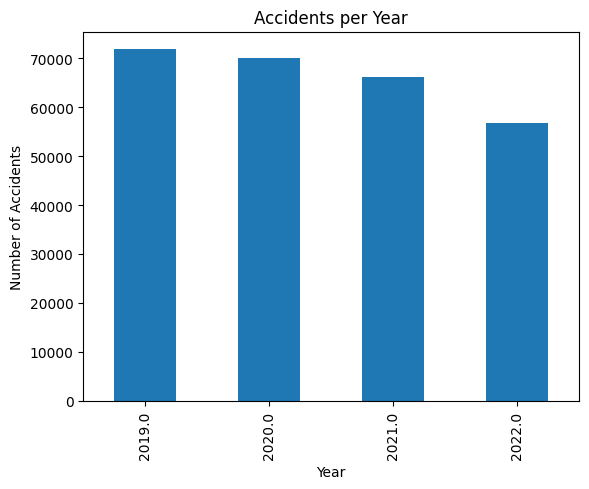

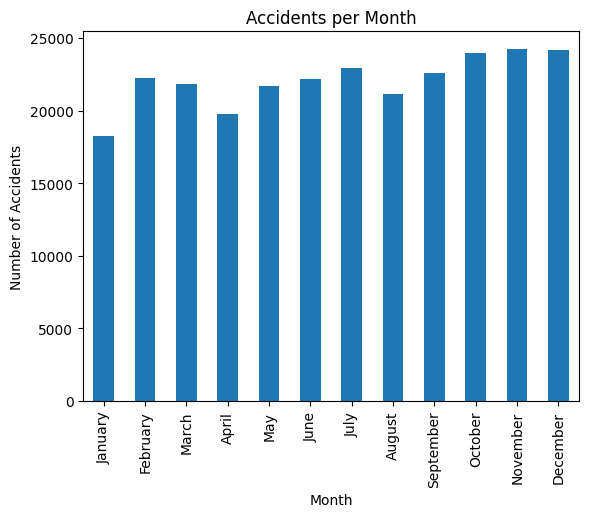

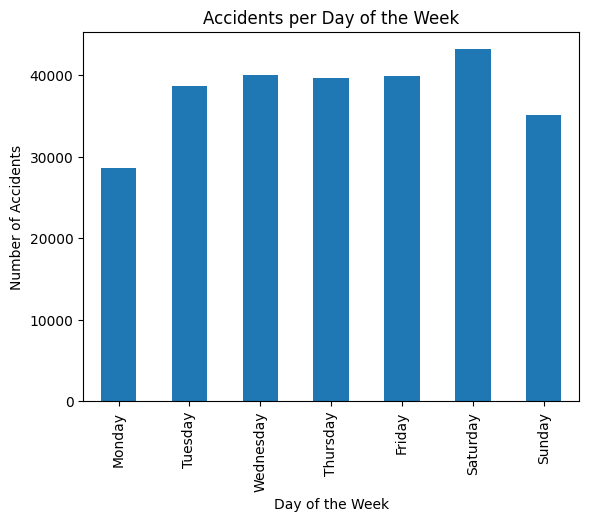

DayofWeek
Monday       28564
Tuesday      38714
Wednesday    40037
Thursday     39641
Friday       39822
Saturday     43164
Sunday       35065
Name: count, dtype: int64


In [31]:

accidents_per_year = accident['Year'].value_counts().sort_index()


accidents_per_month = accident['Months'].value_counts().sort_index()


accidents_per_year.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')  # Corrected label to 'Year'
plt.ylabel('Number of Accidents')
plt.show()

# Month names mapping
month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September',
    10: 'October', 11: 'November', 12: 'December'
}


accidents_per_month.index = accidents_per_month.index.map(month_names)


accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()


day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday',
}


accidents_per_day = accident['DayofWeek'].value_counts().sort_index()


accidents_per_day.index = accidents_per_day.index.map(day_names)


accidents_per_day.plot(kind='bar')
plt.title('Accidents per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.show()

# Print accidents per day
print(accidents_per_day)

<h2>DATA AGGREGATION</h2>

In [32]:
Severity = accident.groupby("Accident_Severity").count()

C:\Users\LAB4-StudentPC12\AppData\Local\Temp\ipykernel_10572\2962249704.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Severity = accident.groupby("Accident_Severity").count()


In [33]:
Severity

,Index,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Months,Day,DayofWeek
Accident_Severity,,,,,,,,,,,,,,,,,
Fatal,8661,3504,8661,8661,8661,8661,8661,8661,8659,8628,8661,8661,8661,3504,3504,3504,3504
Serious,88217,35293,88217,88217,88217,88217,88217,88217,88147,87736,88215,88217,88217,35293,35293,35293,35293
Slight,563801,226210,563801,563801,563801,563801,563801,563801,563147,559795,563788,563801,563801,226210,226210,226210,226210


In [34]:
Severity2 = accident.groupby("Accident_Severity")["Road_Type"].count()

C:\Users\LAB4-StudentPC12\AppData\Local\Temp\ipykernel_10572\1247253871.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Severity2 = accident.groupby("Accident_Severity")["Road_Type"].count()


In [35]:
Severity2

Accident_Severity
Fatal        8628
Serious     87736
Slight     559795
Name: Road_Type, dtype: int64

In [36]:
Severity3 = pd.DataFrame(Severity2)

In [37]:
print(type(Severity3))

<class 'pandas.core.frame.DataFrame'>


C:\Users\LAB4-StudentPC12\AppData\Local\Temp\ipykernel_10572\1122976798.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sev_cas = df_2019.groupby(['Accident_Severity'])['Number_of_Casualties'].sum().reset_index()


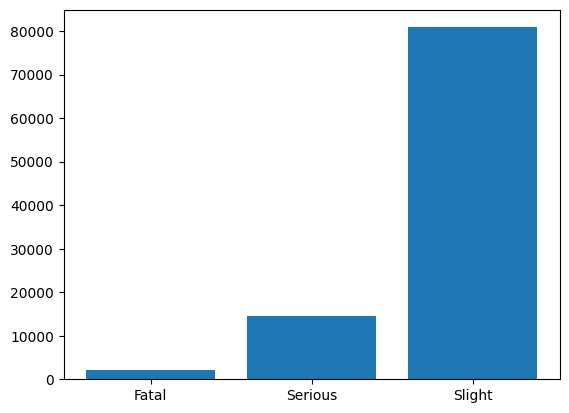

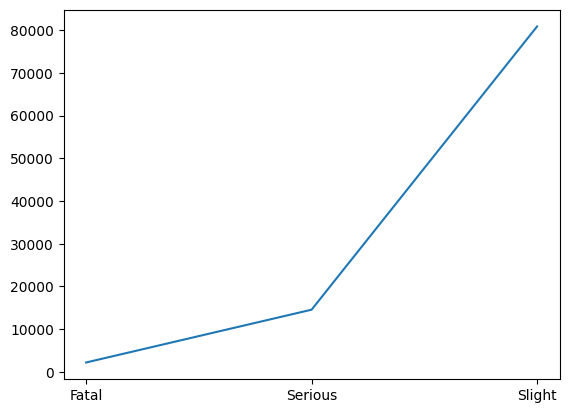

In [38]:
df_2019 = accident[accident['Year'] == 2019]

sev_cas = df_2019.groupby(['Accident_Severity'])['Number_of_Casualties'].sum().reset_index()

x = sev_cas['Accident_Severity']
y = sev_cas['Number_of_Casualties']
plt.bar(x,y)
plt.show() 

plt.plot(x,y)
plt.show()

<h1>Seasonal Analysis</h1>

C:\Users\LAB4-StudentPC12\AppData\Local\Temp\ipykernel_10572\2998496657.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  accidents_per_month_severity = accident.groupby(['Months', 'Accident_Severity']).size().unstack()


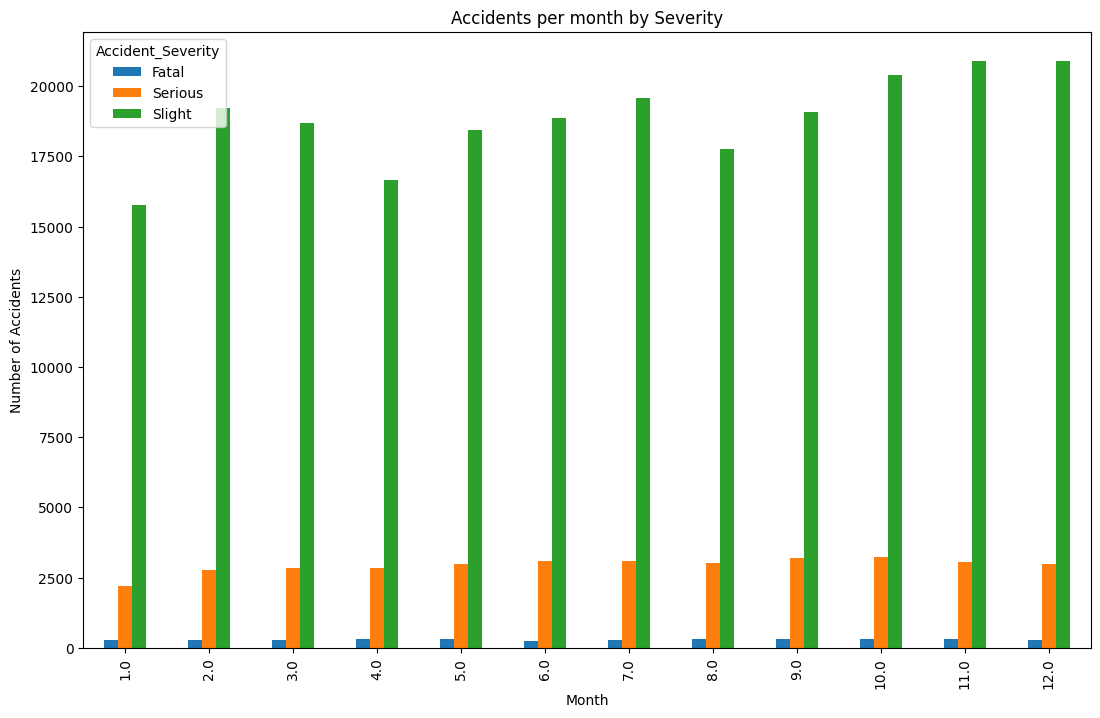

In [39]:
accidents_per_month_severity = accident.groupby(['Months', 'Accident_Severity']).size().unstack()

accidents_per_month_severity.plot(kind='bar')
plt.title('Accidents per month by Severity')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.gcf().set_size_inches(13, 8)
plt.show()

<h1>Line Plot</h1>

C:\Users\LAB4-StudentPC12\AppData\Local\Temp\ipykernel_10572\894892328.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  year_area = accident.groupby(['District Area', 'Year']).size().reset_index(name = 'Accident_Count')


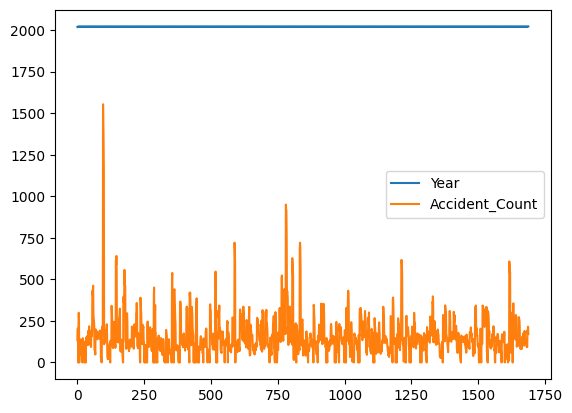

In [40]:
year_area = accident.groupby(['District Area', 'Year']).size().reset_index(name = 'Accident_Count')

year_area.plot()

plt.show()

C:\Users\LAB4-StudentPC12\AppData\Local\Temp\ipykernel_10572\4137892108.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  year_area = accident.groupby(['District Area', 'Year']).size().reset_index(name = 'Accident_Count')


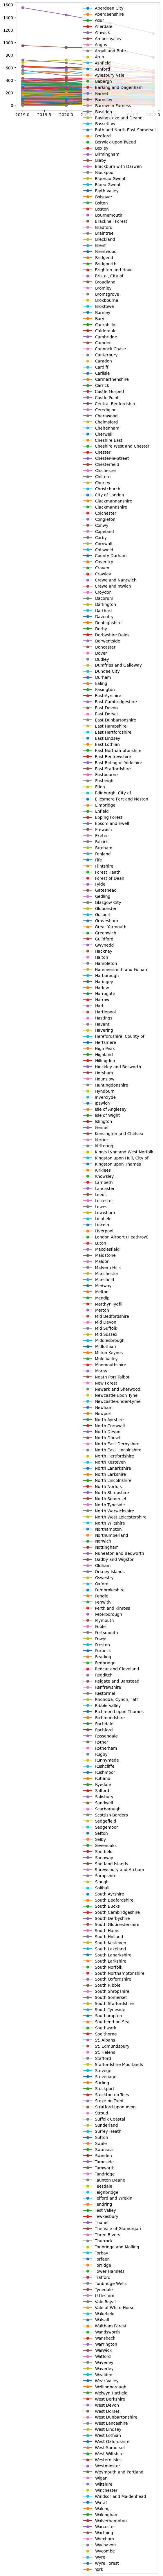

In [41]:
year_area = accident.groupby(['District Area', 'Year']).size().reset_index(name = 'Accident_Count')

easy_df = year_area.pivot(index='Year', columns='District Area', values='Accident_Count')

#line plot
#(x,y)
#plt.plot(easy_df,index, easy_df['Aberdeen City'], label='Aberdeen City', marker='o')
#plt.plot(easy_df,index, easy_df['Aberdeenshire'], label='Aberdeenshire', marker='o')
#plt.plot(easy_df,index, easy_df['Barnet'], label='Barnet', marker='o')
#plt.plot(easy_df,index, easy_df['Bexley'], label='Bexley', marker='o')
#plt.plot(easy_df,index, easy_df['Caradon'], label='Caradon', marker='o')
for x in easy_df:
    plt.plot(easy_df.index, easy_df[x], label=x, marker='o')

plt.legend()
plt.show()

C:\Users\LAB4-StudentPC12\AppData\Local\Temp\ipykernel_10572\33428126.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cas_sev = accident.groupby(['Accident_Severity', 'DayofWeek'])['Number_of_Casualties'].mean().reset_index(name='average accident')


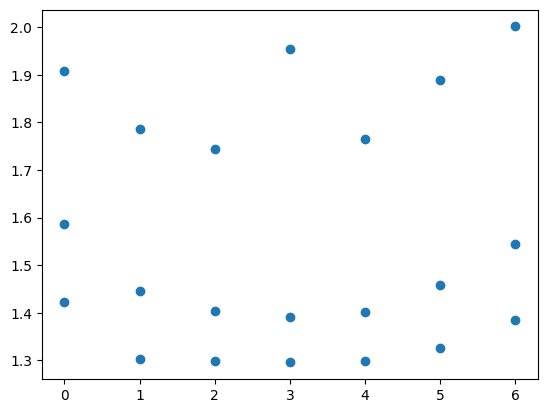

In [44]:
cas_sev = accident.groupby(['Accident_Severity', 'DayofWeek'])['Number_of_Casualties'].mean().reset_index(name='average accident')

plt.scatter(cas_sev['DayofWeek'], cas_sev['average accident'])
plt.show()